Eleonora Pura - 17-732-678

In [3]:
import math
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.stats as sp
from scipy.special import factorial
import networkx.algorithms.community as nxacom
import powerlaw
import warnings
warnings.filterwarnings('ignore')

<h1>A05.1 Scale-Free Networks - Everyday networks are not Poisson: parameter estimation and model selection</h1>

Task: For all given networks compute the degree distribution 𝑃(𝑘) and the average degree ⟨𝑘⟩ and use the powerlaw package to fit 𝑃(𝑘).

<p>1. Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘−𝛾 and the corresponding error</p>
<p>2. Superimpose in the same plot of the power-law fit</p>
<p>(a) the Poisson and</p>
<p>(b) the exponential distribution with mean value equal to ⟨𝑘⟩.</p>

<p>Which distribution is more likely to describe the data?<p>


Calculating best minimal value for power law fit


graph_escort.gml
Power-law exponent 𝛾: 2.9544249080995764
Corresponding error: 0.07919729392592209


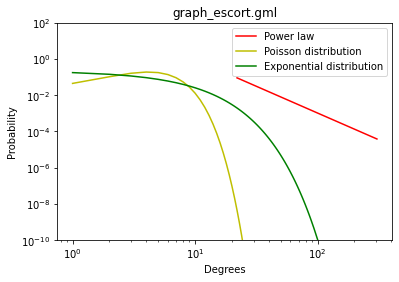

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_internet.gml
Power-law exponent 𝛾: 2.112191339113011
Corresponding error: 0.0366878070312722


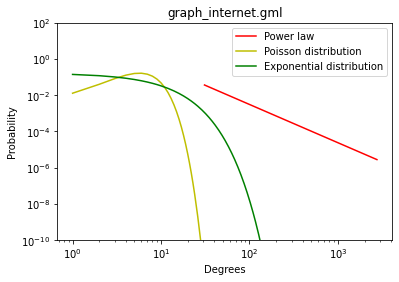

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_amazon.gml
Power-law exponent 𝛾: 4.065660034466614
Corresponding error: 0.09699319113242895


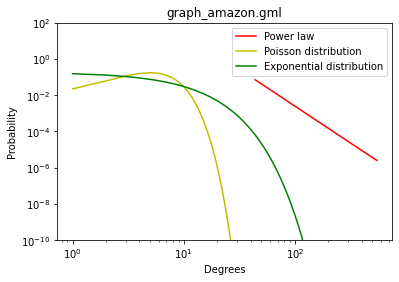

------------------------------------------
------------------------------------------


Calculating best minimal value for power law fit


graph_actors.gml
Power-law exponent 𝛾: 2.1609477665039183
Corresponding error: 0.003276703809865102


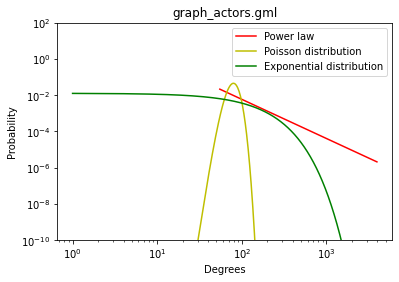

------------------------------------------
------------------------------------------


In [41]:
files = ["graph_escort.gml", "graph_internet.gml", "graph_amazon.gml","graph_actors.gml"]

for filename in files:
    g = nx.read_gml("data/" + filename)
    degrees = [degree for degree in dict(g.degree()).values()]
    avg_degree = np.average(degrees)

    fit = powerlaw.Fit(degrees)

    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    
    print(filename)
    print("Power-law exponent 𝛾: {}".format(alpha))
    print("Corresponding error: {}".format(sigma))

    exponential = []
    poisson = []

    for degree in sorted(set(degrees)):
        exponential.append((avg_degree**-1)*math.exp(-degree/avg_degree))
        poisson.append(((avg_degree**degree)/factorial(degree))*math.exp(-avg_degree))

    plt.title(filename)
    fit.power_law.plot_pdf(color='r', label="Power law")
    plt.plot(sorted(set(degrees)), poisson, color='y', label="Poisson distribution")
    plt.plot(sorted(set(degrees)), exponential, color='g', label="Exponential distribution")
    plt.ylim([10**-10,100])
    plt.xlabel("Degrees")
    plt.ylabel("Probability")

    plt.legend()
    plt.show()
    
    print("------------------------------------------")
    print("------------------------------------------")


<h1>A05.2 Barabási-Albert model</h1>

<p>Task: Build networks with the Barabási-Albert model. Connect 𝑚 = 3 for each new node and grow until 𝑁 = 50, 100, 500, 1000, 5000, then compute some network properties. Compare them with randomised versions of the networks</p>
<p>1. Compute the average clustering coefficient, assortativity,average shortest path length and diameter</p>
<p>2. Compare them by scatterplots with the same measures on randomised versions of the networks (use log x axis)</p>
<p>3. Which of these measures is relatively unchanged by randomisation? Why?</p>



In [57]:
def plot_measures(measure, x, y, xtitle, ytitle, color):
    plt.title("{}".format(measure))
    plt.plot(x, y, c=color)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.xscale('log')
    plt.show()
    

In [41]:
m = 3
Ns = [50, 100, 500, 1000, 5000]
avg_cc_list = []
avg_cc_list_rnd = []
ass_coeff_list = []
ass_coeff_list_rnd = []
avg_spl_list = []
avg_spl_list_rnd = []
diameter_list = []
diameter_list_rnd = []


for N in Ns:
    g = nx.barabasi_albert_graph(N, m)
    grnd = nx.algorithms.smallworld.random_reference(g, niter = 1, connectivity=False)
    
    # Average clustering coefficient
    avg_cc = nx.average_clustering(g)
    avg_cc_list.append(avg_cc)
    
    avg_cc_rnd = nx.average_clustering(grnd)
    avg_cc_list_rnd.append(avg_cc_rnd)
    
    # Assortativity coefficient
    ass_coeff = nx.degree_assortativity_coefficient(g)
    ass_coeff_list.append(ass_coeff)
    
    ass_coeff_rnd = nx.degree_assortativity_coefficient(grnd)
    ass_coeff_list_rnd.append(ass_coeff_rnd)
    
    # Average shortest path length
    avg_spl = nx.average_shortest_path_length(g)
    avg_spl_list.append(avg_spl)
    
    avg_spl_rnd = nx.average_shortest_path_length(grnd)
    avg_spl_list_rnd.append(avg_spl_rnd)
    
    # Diameter
    diameter = nx.diameter(g)
    diameter_list.append(diameter)
    
    diameter_rnd = nx.diameter(grnd)
    diameter_list_rnd.append(diameter_rnd)
    
    
    print("Barabási-Albert model with N = {}".format(N))
    print("Average clustering coefficient: {}, with grand: {}".format(avg_cc, avg_cc_rnd))
    print("Assortativity coefficient: {}, with grand: {}".format(ass_coeff, ass_coeff_rnd))
    print("Average shortest path length: {}, with grand: {}".format(avg_spl, avg_spl_rnd))
    print("Diameter: {}, with grand: {}".format(diameter, diameter_rnd))
    print("------------------------------------------")
    print("------------------------------------------")
    
    

Barabási-Albert model with N = 50
Average clustering coefficient: 0.18698634698634695, with grand: 0.20845571095571092
Assortativity coefficient: -0.16983096471755943, with grand: -0.2147074451586105
Average shortest path length: 2.3110204081632655, with grand: 2.3224489795918366
Diameter: 4, with grand: 4
------------------------------------------
------------------------------------------
Barabási-Albert model with N = 100
Average clustering coefficient: 0.12330765781761992, with grand: 0.12934158220021602
Assortativity coefficient: -0.08831819100718707, with grand: -0.1334440250140319
Average shortest path length: 2.6187878787878787, with grand: 2.624242424242424
Diameter: 4, with grand: 5
------------------------------------------
------------------------------------------
Barabási-Albert model with N = 500
Average clustering coefficient: 0.052351346295976736, with grand: 0.046683749697121836
Assortativity coefficient: -0.12678816118185202, with grand: -0.09697585580541906
Average 

Graphs for for N = [50, 100, 500, 1000, 5000]


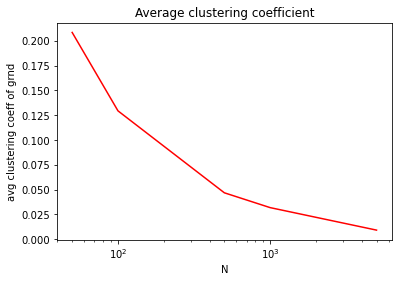

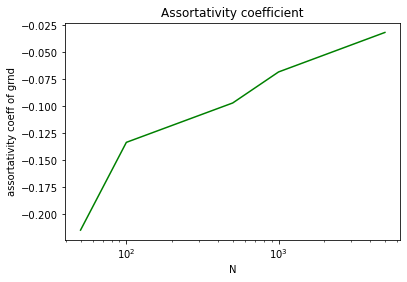

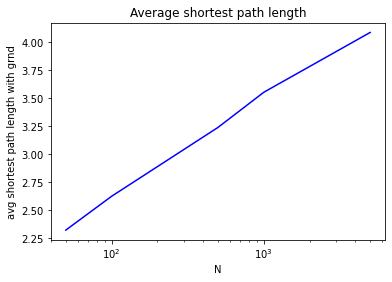

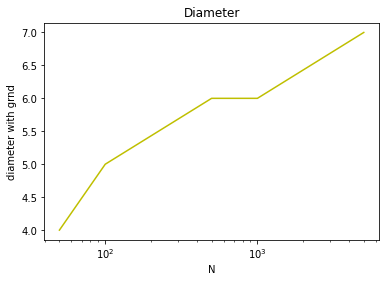

In [58]:
print("Graphs for for N = [50, 100, 500, 1000, 5000]")

plot_measures("Average clustering coefficient", Ns, avg_cc_list_rnd, "N", "avg clustering coeff of grnd", 'r')
plot_measures("Assortativity coefficient", Ns, ass_coeff_list_rnd, "N", "assortativity coeff of grnd", 'g')
plot_measures("Average shortest path length", Ns, avg_spl_list_rnd, "N", "avg shortest path length with grnd", 'b')
plot_measures("Diameter", Ns, diameter_list_rnd, "N", "diameter with grnd", 'y')